In [8]:
import numpy as np
import cv2
from matplotlib.image import imread
from matplotlib import pyplot as plt

In [9]:
path ='D:/apple.jpeg'

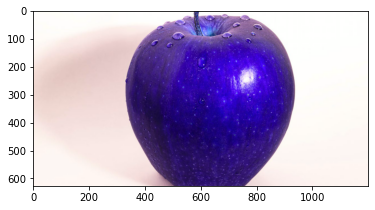

(627, 1200, 3)
uint8
255
0


In [25]:
def readImage(path):
        image = cv2.imread(path)
        return image   
    
image= readImage(path)
plt.imshow(image)
plt.show()

print(image.shape)
print(image.dtype)

print(image.max())
print(image.min())

In [83]:
def hist_plot(img):
      
    # empty list to store the count 
    # of each intensity value
    count =[]
    # empty list to store intensity 
    # value
    r = []
    # loop to traverse each intensity 
    # value
    for k in range(0, 256):
        r.append(k)
        count1 = 0
          
        # loops to traverse each pixel in 
        # the image 
        for i in range(m):
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (r, count)

In [ ]:
# To ascertain total numbers of rows and 
# columns of the image, size of the image
m, n = image.shape[:2]
r1, count1 = hist_plot(image[:,:,0]) # blue
r2, count2 = hist_plot(image[:,:,1]) # green 
r3, count3 = hist_plot(image[:,:,2]) # red 
  

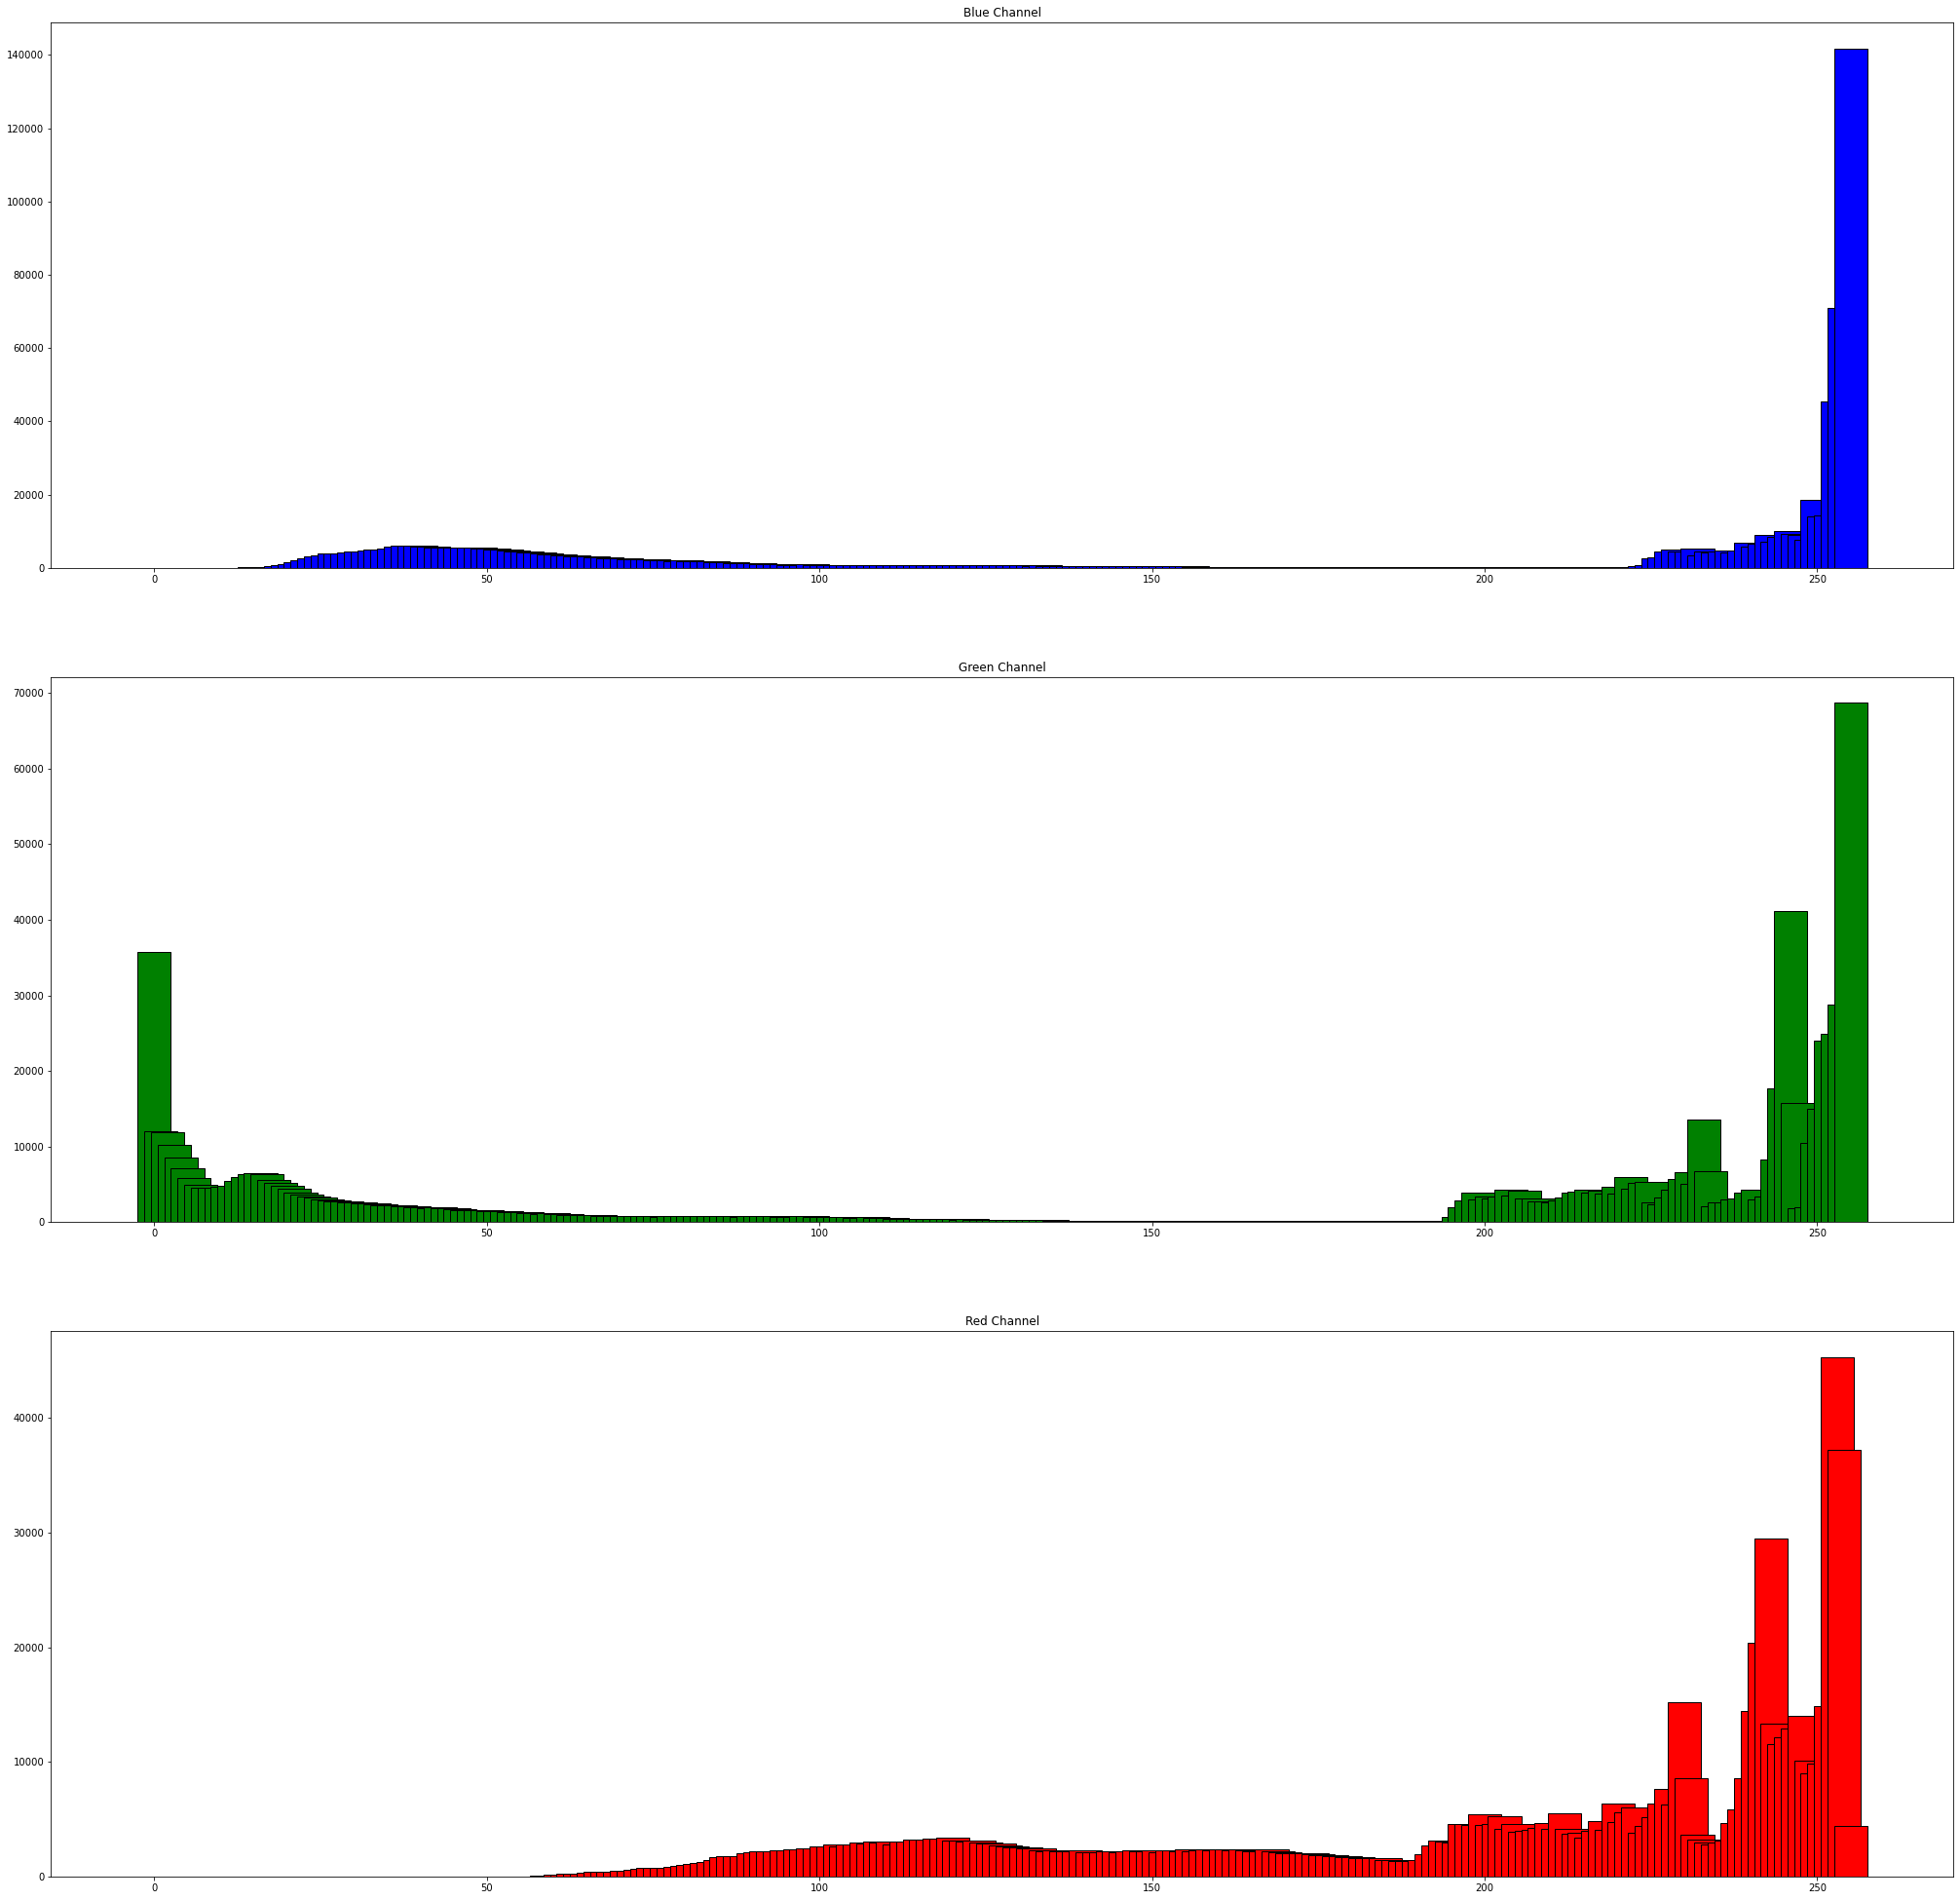

In [98]:
figure, axis = plt.subplots(3, 1, figsize = (35, 35))
  
# For Sine Function
axis[0].bar(r1,count1,width=5,color='Blue',edgecolor='black', align='center')
axis[0].set_title("Blue Channel")

# For Sine Function
axis[1].bar(r2,count2,width=5,color='Green',edgecolor='black', align='center')
axis[1].set_title("Green Channel")

# For Sine Function
axis[2].bar(r3,count3,width=5,color='Red',edgecolor='black', align='center')
axis[2].set_title("Red Channel")

plt.show()

<ipython-input-87-da05313ad073>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2= fig.add_axes([5,0.8,2, 2])
<ipython-input-87-da05313ad073>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_axes([5,0.8,2, 2])


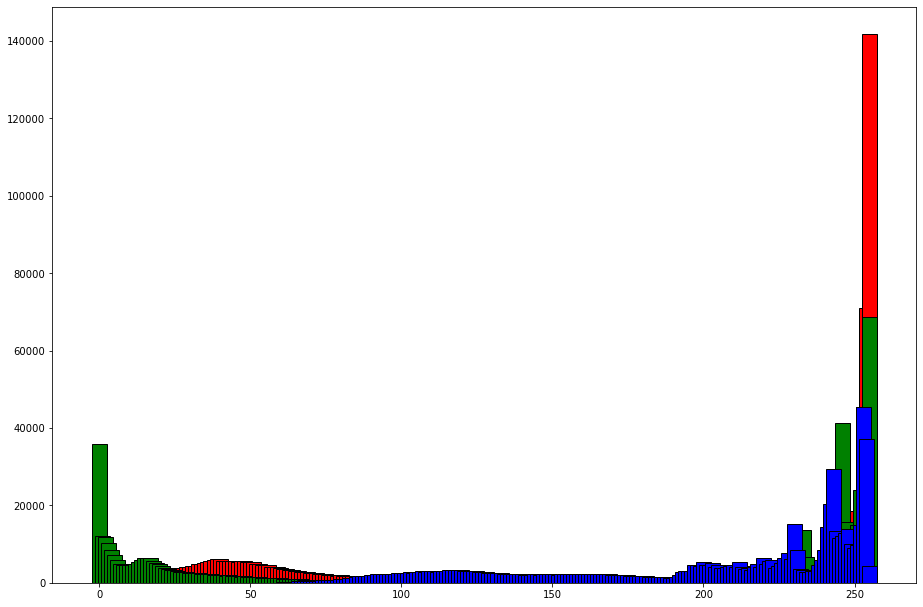

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_axes([5,0.8,2, 2])
ax2= fig.add_axes([5,0.8,2, 2])
ax3 = fig.add_axes([5,0.8,2, 2])
ax1.bar(r1,count1,width=5,color='red',edgecolor='black', align='center')
ax2.bar(r2,count2,width=5,color='green',edgecolor='black', align='center')
ax3.bar(r3,count3,width=5,color='blue',edgecolor='black', align='center')
plt.show()

Text(0.5, 1.0, 'Histogram of the original image')

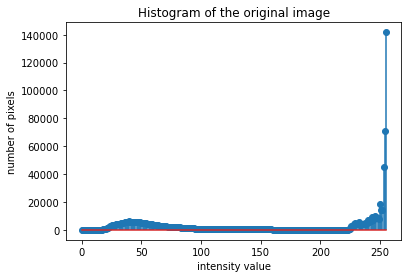

In [100]:
# plotting the histogram
plt.stem(r1, count1)
# plt.stem(r2, count2)
# plt.stem(r3, count3)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')

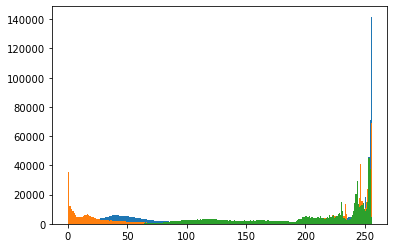

In [86]:
###Test###
plt.hist(image[:,:,0].ravel(),256,[0,256])
plt.hist(image[:,:,1].ravel(),256,[0,256])
plt.hist(image[:,:,2].ravel(),256,[0,256])

plt.show()

In [137]:
def Hist(image):
    H = np.zeros(shape = (256,1))
    s = image.shape
    for i in range (s[0]):
        for j in range(s[1]):
            k=image[i,j] 
            H[k,0]+=1
    return H

Hist(image);

In [132]:
# def get_histogram(image_input,bins):
#         # array with size of bins, set to zeros
#         histogram = np.zeros(bins)
        
#         # loop through pixels and sum up counts of pixels
#         for pixel in image_input:
#             histogram[pixel] += 1
# #             print(pixel)
        
#         y=np.linspace(0,np.max(histogram))
#         # return our final result
#         return histogram

# hist= get_histogram(image[:,:,0].flatten(), 256)
# plt.plot(hist)

In [148]:
 def cumulative_distrubution(count):
        hist= iter(count)
        b = [next(hist)]
        for i in hist:
            b.append(b[-1] + i)
        
        b = np.array(b)
        curve= ((b - b.min()) * 255)/(b.max() - b.min())

        return curve

Text(0.5, 1.0, 'Red Channel')

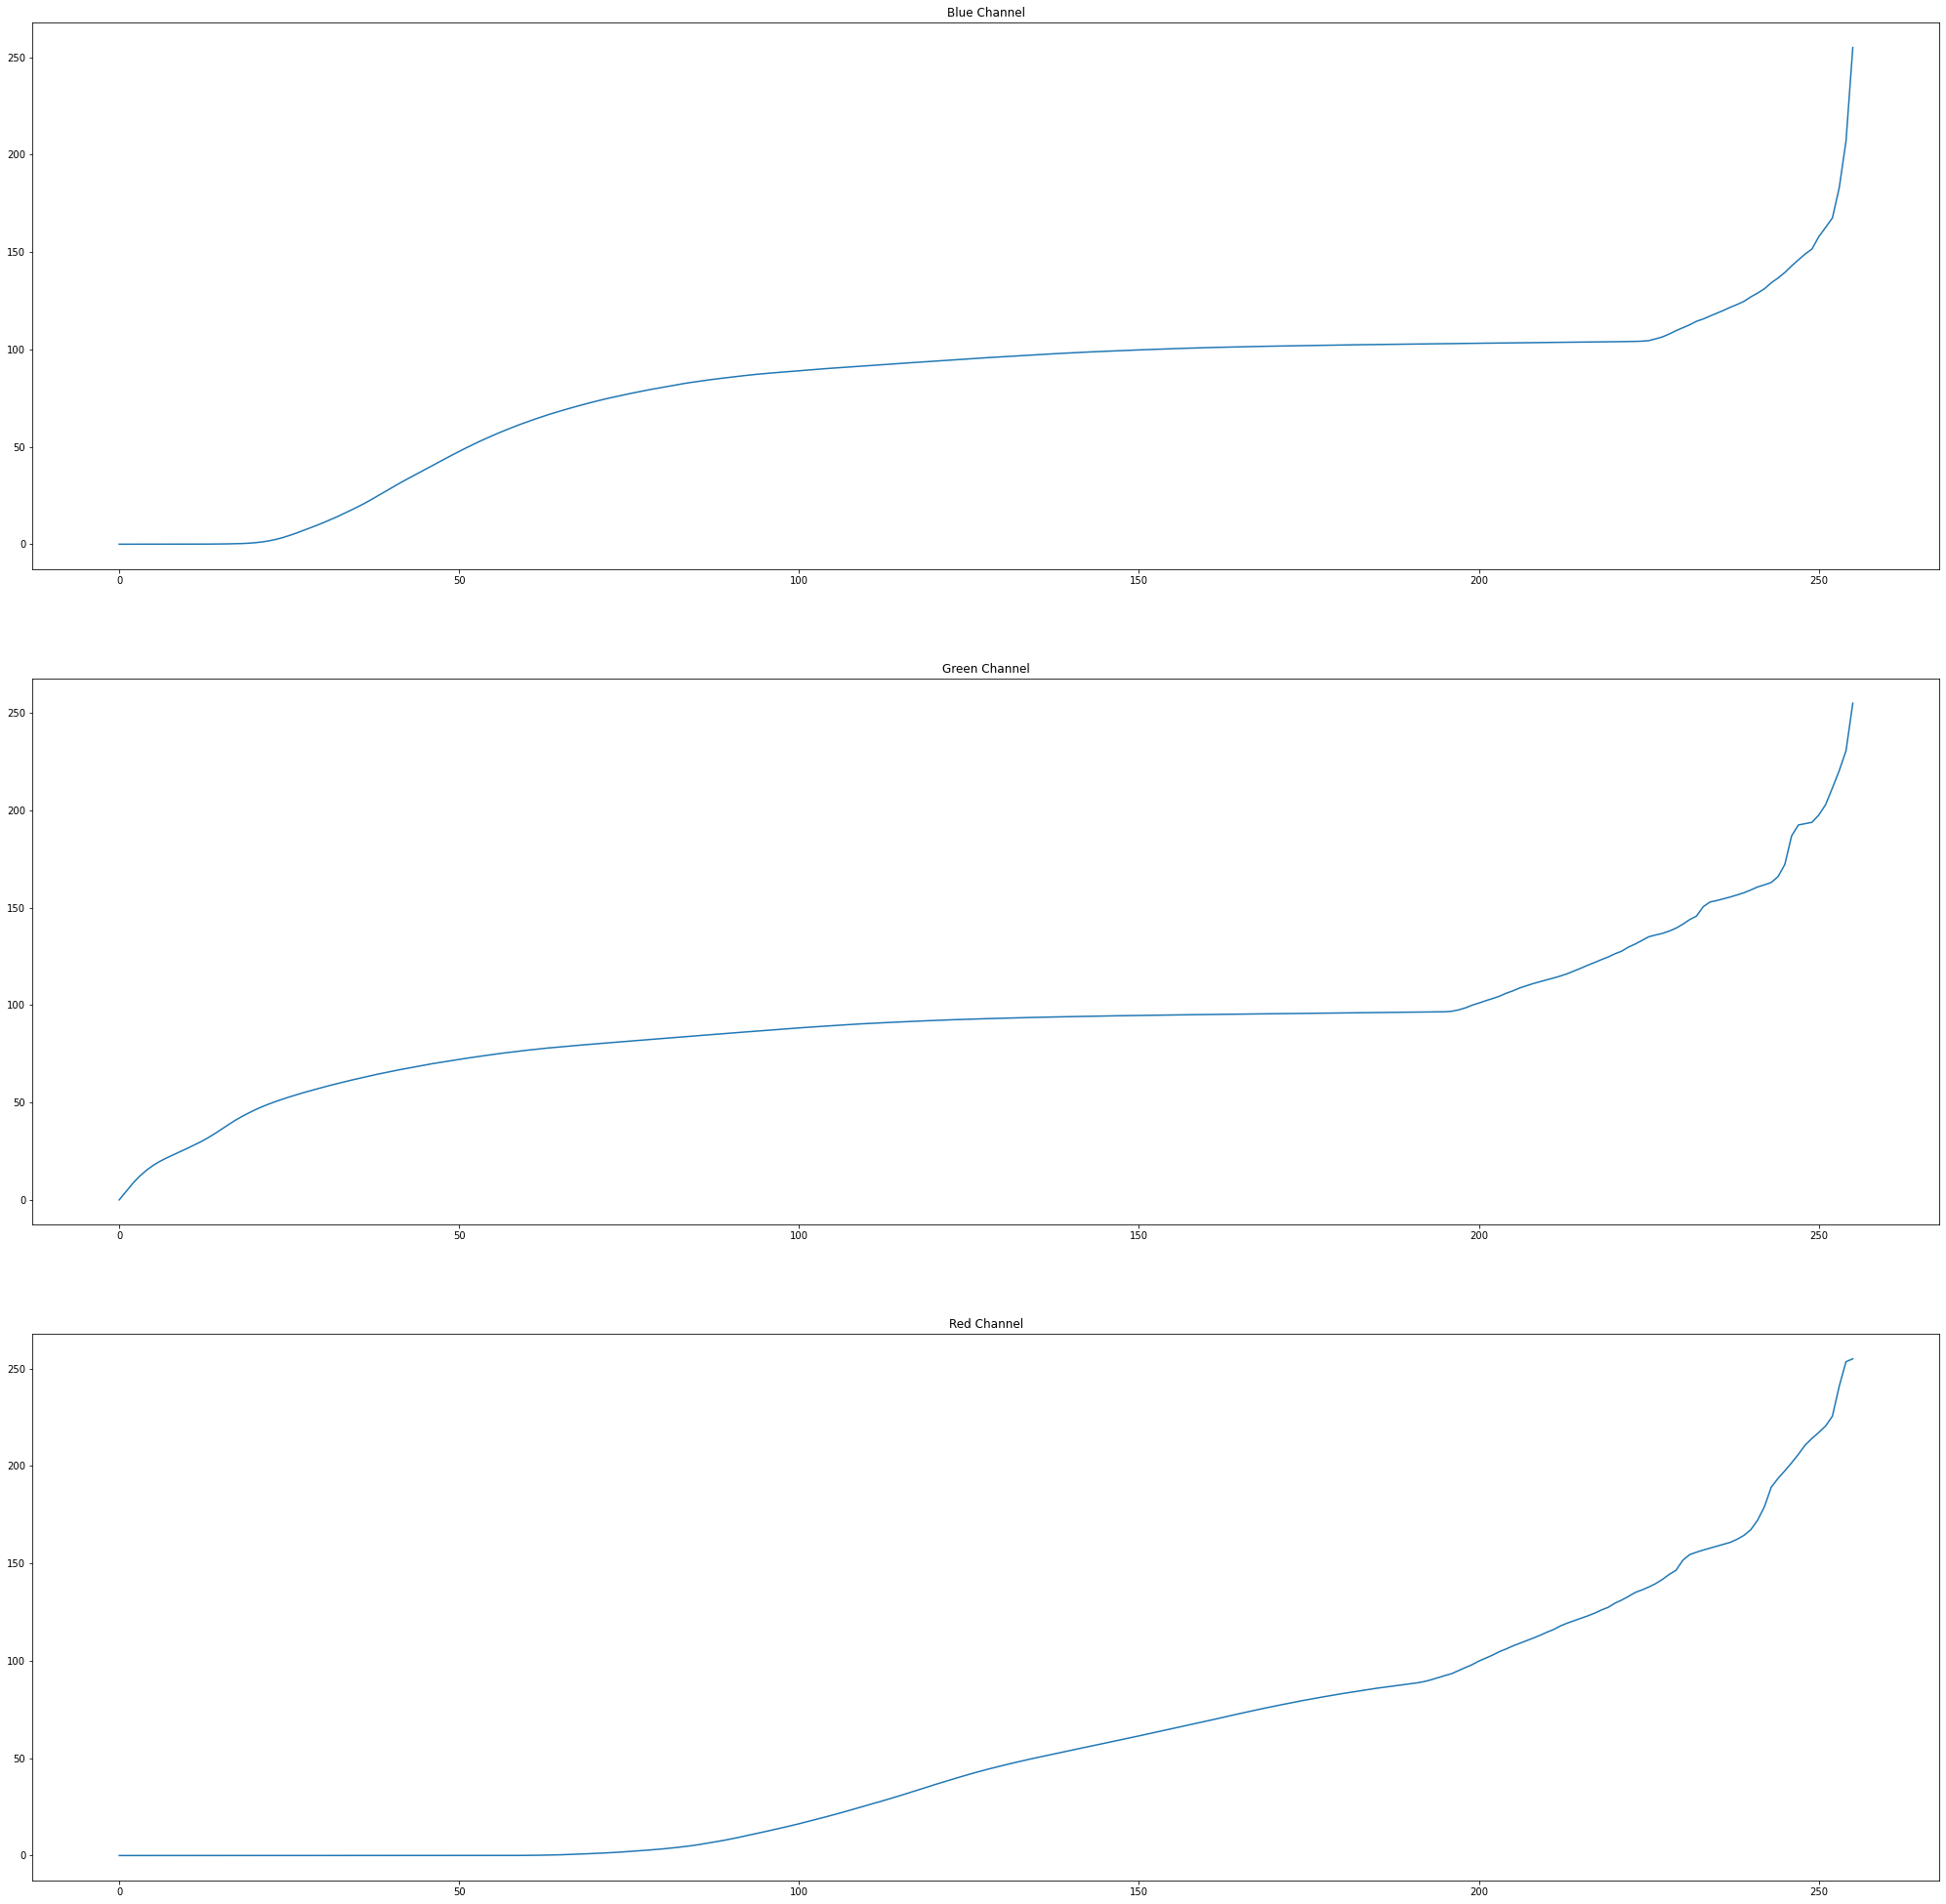

In [155]:
figure, axis = plt.subplots(3, 1, figsize = (35, 35))

curve1=cumulative_distrubution(count1)
curve2=cumulative_distrubution(count2)
curve3= cumulative_distrubution(count3)

axis[0].plot(curve1)
axis[0].set_title("Blue Channel")

axis[1].plot(curve2)
axis[1].set_title("Green Channel")

axis[2].plot(curve3)
axis[2].set_title("Red Channel")


In [11]:
def get_mean(img):
    l_channels=[]
    l_means=[]
    m,n,c=image.shape
    for k in range(c):
        sum_val=0
        for i in range(m):
            for j in range(n):
                sum_val+=img[i, j,k]
        l_channels.append(sum_val)
    for channel in l_channels: 
        mean= channel/(m*n)
        l_means.append(mean)
        
    return l_means

print(get_mean(image))

[173.80355396065923, 154.39418261562997, 198.27997208931419]


In [12]:
np.sum(get_mean(image))/3

175.49256955520113

In [13]:
np.mean(image)

175.49256955520113

In [14]:
def get_stdev(img): 
    m,n,c=img.shape
    l_sums=[]
    l_dev=[]
    for k in range(c):
        mean= get_mean(img)[k]
        sum_val=0
        for i in range(m):
            for j in range(n):
                sum_val+=((img[i,j,k]-mean)**2)
        l_sums.append(sum_val)
        
    for l_sum in l_sums:
        dev=np.sqrt(l_sum/(m*n))
        l_dev.append(dev)
        
    return l_dev

In [15]:
get_stdev(image)

[94.18642121126044, 105.032825196878, 54.333552051412916]

In [16]:
np.sum(get_stdev(image))/3

84.51759948651711

In [17]:
print(np.std(image[:,:,0]))
print(np.std(image[:,:,1]))
print(np.std(image[:,:,2]))

print((np.std(image[:,:,0])+np.std(image[:,:,1])+np.std(image[:,:,2]))/3)

94.1864212112645
105.03282519702765
54.33355205139163
84.51759948656125


In [18]:
np.std(image)

89.11111342468003

In [19]:
from PIL import Image, ImageStat

im = Image.open('D:/apple.jpeg')
stat = ImageStat.Stat(im)
print(stat.stddev)

[54.33355205139164, 105.03282519702765, 94.18642121126453]


In [45]:
def normalization(img):
    m,n,c = img.shape
    norm_img=np.zeros(img.shape,dtype='uint8')
    print(norm_img.shape)
    mean= get_mean(img)
    stddev= get_stdev(img)
    for k in range(c):
        mean_c= mean[k]
        stddev_c=stddev[k]
        for i in range(m):
            for j in range(n):
                norm_img[i,j,k]=(img[i,j,k]-mean_c)/stddev_c

            
    return norm_img
    

(627, 1200, 3)


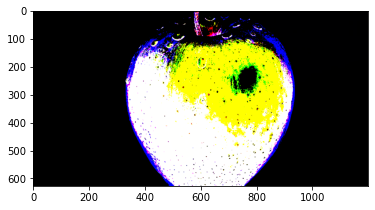

In [46]:
norm_img=normalization(image)
plt.imshow(norm_img)

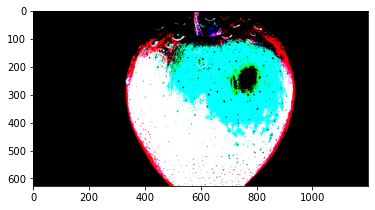

In [47]:
plt.imshow(cv2.cvtColor(norm_img, cv2.COLOR_BGR2RGB))

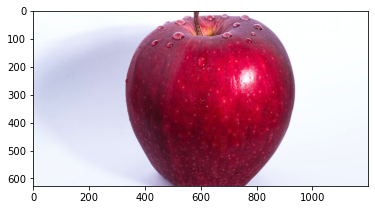

In [48]:
# plt.imshow(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [49]:
print(norm_img.max())
print(norm_img.min())

255
0


In [50]:
def normalization(img):
    m,n,c = img.shape
    norm_img=np.zeros(img.shape,dtype='uint8')
    print(norm_img.shape)
    for k in range(c):
        max_c=np.max(img[:,:,k])
        min_c=np.min(img[:,:,k])
        for i in range(m):
            for j in range(n):
                norm_img[i,j,k]=((img[i,j,k]-min_c)/(max_c-min_c))*255
    return norm_img
    

(627, 1200, 3)


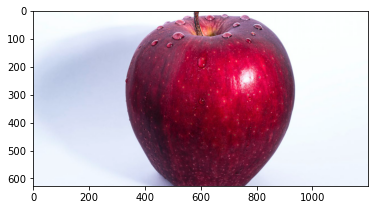

In [56]:
imge_norm= normalization(image)
# plt.imshow(imge_norm)

plt.imshow(cv2.cvtColor(imge_norm, cv2.COLOR_BGR2RGB))

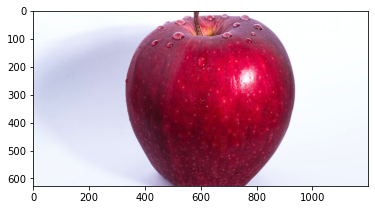

In [55]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

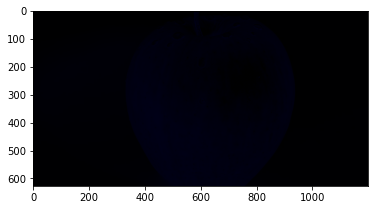

In [57]:
plt.imshow(image-imge_norm)

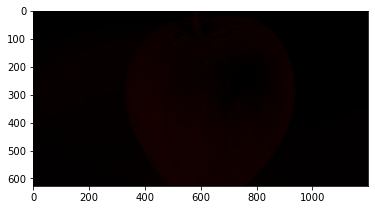

In [59]:
plt.imshow(cv2.cvtColor(image-imge_norm, cv2.COLOR_BGR2RGB))

In [ ]:
####### Equalization ########